# Proyección de Variables Macroeconómicas HOLT WINTERS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px

In [2]:
data = pd.read_csv('data_modelo.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')
#data.head()

In [3]:
data_nodiff = pd.read_csv('df_m.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')
data_nodiff = data_nodiff['2014-02-01':'2020-03-01']

In [4]:
# Sin pandemia
data1 = data['2014-02-01':'2020-02-01']
#data_variable = pd.DataFrame(data1['entrada'])
#data_variable.tail

In [5]:
# Grafico
#data_variable.plot(title='Entrada pre pandemia')

In [6]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
m = 12
alpha = 1/(2*m)

In [8]:
def modelo_HW (data,variable):
    data_variable = pd.DataFrame(data1[variable])
    data_variable['HWES1'] = SimpleExpSmoothing(data_variable).fit(smoothing_level=alpha, optimized=False,
                                                                use_brute=True).fittedvalues
    data_variable['HWES2_ADD'] = ExponentialSmoothing(data_variable[variable]
                                                      ,trend='add').fit().fittedvalues
  #  data_variable['HWES2_MULT'] = ExponentialSmoothing(data_variable[variable]
  #                                                     ,trend='mul').fit().fittedvalues
    data_variable['HWES3_ADD'] = ExponentialSmoothing(data_variable[variable],trend='add', seasonal='add',
                                                      seasonal_periods=12).fit().fittedvalues
  #  data_variable['HWES3_MULT'] = ExponentialSmoothing(data_variable[variable],trend='mul',seasonal='add',
  #                                                  seasonal_periods=12).fit().fittedvalues
    globals()['HW_'+variable] = data_variable.copy()
    return data_variable
# En presencia de valores negativos el modelo multipilcativo falla

In [9]:
#modelo_HW(data1, 'comercio')

In [10]:
#HW_comercio.plot()

In [11]:
# Modelo de proyeccion
def HT(variable):
    fitted_model = ExponentialSmoothing(data1[variable],trend='add', 
                                                         seasonal='add', seasonal_periods=12).fit()
    predictions = fitted_model.forecast(24)
    return predictions

In [12]:
def cambio (variable):
    ultimo_valor =data_nodiff.shape[0]-1
    #ultimo_valor
    s = pd.Series(data_nodiff[variable])
    #s
    t = pd.Series(globals()['proy_'+variable])
    t.iloc[0] = np.log(s.iat[ultimo_valor])
    estimados = np.exp(t.cumsum())
    return estimados

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2019-12-01    357.000000
2020-01-01    786.108962
2020-02-01    659.088948
2020-03-01    708.540896
2020-04-01    659.649218
2020-05-01    648.056080
2020-06-01    657.992289
2020-07-01    726.952354
2020-08-01    696.700561
2020-09-01    609.109530
2020-10-01    657.078733
2020-11-01    642.109417
2020-12-01    721.609841
2021-01-01    754.885795
2021-02-01    632.910841
2021-03-01    680.398625
2021-04-01    633.448858
2021-05-01    622.316183
2021-06-01    631.857739
2021-07-01    698.078805
2021-08-01    669.028572
2021-09-01    584.916536
2021-10-01    630.980469
2021-11-01    616.605713
2021-12-01    692.948490
2022-01-01    724.902768
2022-02-01    607.772492
2022-03-01    653.374127
2022-04-01    608.289140
Freq: MS, dtype: float64

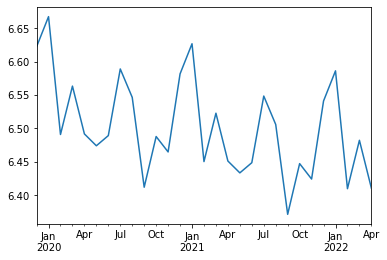

In [13]:
# Modelo de la variable ENTRADA se trabaja de manera distinta por el cambio de fecha
data11 = data['2014-02-01':'2019-11-01']
fitted_model = ExponentialSmoothing(data11['entrada'],trend='add', 
                                                         seasonal='add', seasonal_periods=12).fit()
proy_entrada = fitted_model.forecast(29)
proy_entrada.plot()
# Proyeccion
#cambio_entrada = cambio('entrada')
#cambio_entrada
ultimo_valor =data_nodiff.shape[0]-1
ultimo_valor
s = pd.Series(data_nodiff['entrada'])
#s
t = pd.Series(proy_entrada)
t.iloc[0] = np.log(s.iat[ultimo_valor])
cambio_entrada = np.exp(t)
cambio_entrada

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    154.000000
2020-04-01    154.520350
2020-05-01    154.745089
2020-06-01    154.700788
2020-07-01    154.564012
2020-08-01    154.375768
2020-09-01    154.622410
2020-10-01    154.478251
2020-11-01    153.310117
2020-12-01    154.396790
2021-01-01    153.916069
2021-02-01    153.841341
2021-03-01    154.169184
2021-04-01    154.679422
2021-05-01    154.893696
2021-06-01    154.838658
2021-07-01    154.691077
2021-08-01    154.492009
2021-09-01    154.728150
2021-10-01    154.573217
2021-11-01    153.393771
2021-12-01    154.470369
2022-01-01    153.978785
2022-02-01    153.893398
Freq: MS, dtype: float64

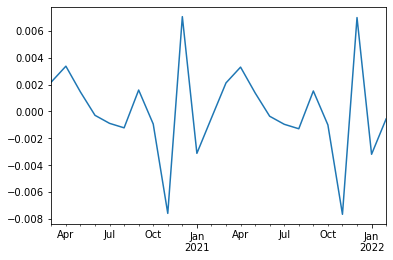

In [14]:
# Modelo de la variable IPC se trabaja de manera distinta por el cambio de fecha
data11 = data_nodiff['2014-02-01':'2020-02-01']
data11 = pd.DataFrame(np.log(data11['ipc']+1).diff().dropna())
#data11
fitted_model = ExponentialSmoothing(data11['ipc'],trend='add', 
                                                         seasonal='add', seasonal_periods=12).fit()
proy_ipc = fitted_model.forecast(24)
proy_ipc.plot()
# Proyeccion
cambio_ipc = cambio('ipc')
cambio_ipc

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    11268.600000
2020-04-01    11210.993338
2020-05-01    11183.328139
2020-06-01    11124.804050
2020-07-01    11215.659112
2020-08-01    11315.691773
2020-09-01    11293.502444
2020-10-01    11355.057776
2020-11-01    11423.004706
2020-12-01    11050.856769
2021-01-01    11030.028615
2021-02-01    10955.235347
2021-03-01    10857.583341
2021-04-01    10789.958334
2021-05-01    10751.256067
2021-06-01    10682.993703
2021-07-01    10758.156748
2021-08-01    10841.931041
2021-09-01    10808.530345
2021-10-01    10855.249475
2021-11-01    10907.953574
2021-12-01    10540.745793
2022-01-01    10509.075047
2022-02-01    10426.103471
Freq: MS, dtype: float64

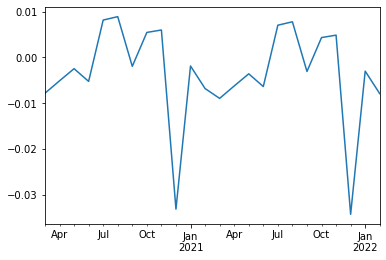

In [15]:
proy_comercio = HT('comercio')
proy_comercio.plot()
cambio_comercio = cambio('comercio')
cambio_comercio

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    595.105020
2020-04-01    458.109806
2020-05-01    452.010727
2020-06-01    465.152984
2020-07-01    492.206047
2020-08-01    499.791279
2020-09-01    489.952959
2020-10-01    538.469403
2020-11-01    514.352593
2020-12-01    514.106895
2021-01-01    527.719060
2021-02-01    521.734268
2021-03-01    569.097525
2021-04-01    437.175059
2021-05-01    430.454484
2021-06-01    442.045539
2021-07-01    466.778509
2021-08-01    472.982734
2021-09-01    462.704480
2021-10-01    507.461451
2021-11-01    483.721806
2021-12-01    482.481724
2022-01-01    494.222968
2022-02-01    487.598334
Freq: MS, dtype: float64

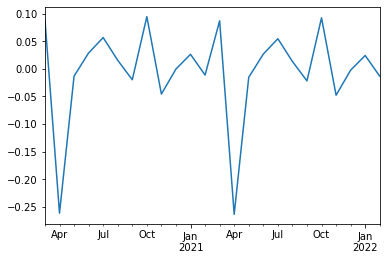

In [16]:
# Modelo
proy_pib_const_f = HT('pib_const_f')
proy_pib_const_f.plot()
# Proyeccion
cambio_pib_const_f = cambio('pib_const_f')
cambio_pib_const_f

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    242.816125
2020-04-01    240.971641
2020-05-01    236.037617
2020-06-01    235.036243
2020-07-01    217.022385
2020-08-01    214.265174
2020-09-01    210.398308
2020-10-01    202.659930
2020-11-01    202.274870
2020-12-01    195.898020
2021-01-01    206.035018
2021-02-01    202.877667
2021-03-01    198.410686
2021-04-01    196.114211
2021-05-01    191.328621
2021-06-01    189.753219
2021-07-01    174.507638
2021-08-01    171.599923
2021-09-01    167.827581
2021-10-01    161.006933
2021-11-01    160.056830
2021-12-01    154.389556
2022-01-01    161.727735
2022-02-01    158.610999
Freq: MS, dtype: float64

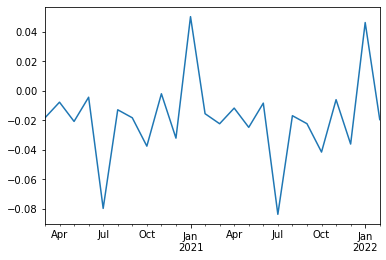

In [17]:
# Modelo
proy_ied_empresas = HT('ied_empresas')
proy_ied_empresas.plot()
# Proyeccion
cambio_ied_empresas = cambio('ied_empresas')
cambio_ied_empresas

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    626423.000000
2020-04-01    631407.772259
2020-05-01    667685.779536
2020-06-01    653543.889471
2020-07-01    692894.709839
2020-08-01    714577.303496
2020-09-01    725637.738839
2020-10-01    735331.603922
2020-11-01    699484.085696
2020-12-01    722964.882376
2021-01-01    728873.032803
2021-02-01    666090.385171
2021-03-01    731160.086311
2021-04-01    739005.331279
2021-05-01    783614.822341
2021-06-01    769127.149064
2021-07-01    817680.227893
2021-08-01    845587.075509
2021-09-01    861037.065797
2021-10-01    874939.624713
2021-11-01    834575.361508
2021-12-01    864963.519073
2022-01-01    874430.583156
2022-02-01    801308.018643
Freq: MS, dtype: float64

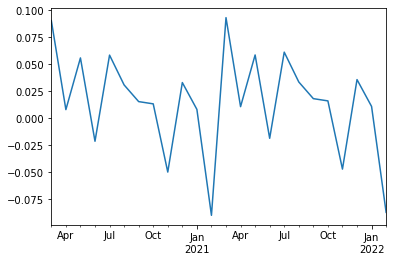

In [18]:
# Modelo
proy_mcp = HT('mcp')
proy_mcp.plot()
# Proyeccion
cambio_mcp = cambio('mcp')
cambio_mcp

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    192.600000
2020-04-01    124.278018
2020-05-01    109.280286
2020-06-01    200.667203
2020-07-01    105.422824
2020-08-01    113.831837
2020-09-01    179.132876
2020-10-01    112.435184
2020-11-01    105.764736
2020-12-01    230.506273
2021-01-01    111.099693
2021-02-01    108.830080
2021-03-01    219.193878
2021-04-01    141.672176
2021-05-01    124.781493
2021-06-01    229.510659
2021-07-01    120.775604
2021-08-01    130.625036
2021-09-01    205.899876
2021-10-01    129.449724
2021-11-01    121.971368
2021-12-01    266.267315
2022-01-01    128.548223
2022-02-01    126.130546
Freq: MS, dtype: float64

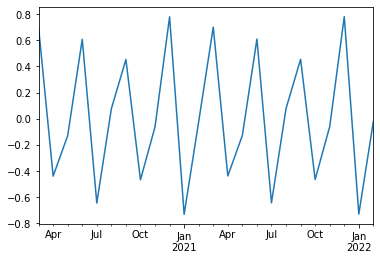

In [19]:
# Modelo
proy_itdm = HT('itdm')
proy_itdm.plot()
# Proyeccion
cambio_itdm = cambio('itdm')
cambio_itdm

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-02-01    491.500000
2020-03-01    537.857636
2020-04-01    527.173854
2020-05-01    521.251713
2020-06-01    509.755082
2020-07-01    517.921955
2020-08-01    532.906898
2020-09-01    510.046327
2020-10-01    526.283967
2020-11-01    501.419894
2020-12-01    550.502626
2021-01-01    515.070808
2021-02-01    488.983616
2021-03-01    534.682737
2021-04-01    523.649538
2021-05-01    517.359460
2021-06-01    505.550451
2021-07-01    513.245673
2021-08-01    527.679661
2021-09-01    504.645815
2021-10-01    520.301681
2021-11-01    495.330064
2021-12-01    543.388647
2022-01-01    508.014537
2022-02-01    481.905130
2022-03-01    526.527964
Freq: MS, dtype: float64

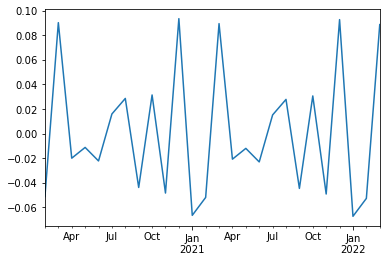

In [20]:
# Modelo
data11 = data['2014-02-01':'2020-01-01']
fitted_model = ExponentialSmoothing(data11['gasolina'],trend='add', 
                                                         seasonal='add', seasonal_periods=12).fit()
proy_gasolina = fitted_model.forecast(26)
proy_gasolina.plot()
# Proyeccion
cambio_gasolina = cambio('gasolina')
cambio_gasolina

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    57.700000
2020-04-01    60.581102
2020-05-01    58.231775
2020-06-01    57.602333
2020-07-01    57.695694
2020-08-01    57.051604
2020-09-01    57.262936
2020-10-01    56.749458
2020-11-01    56.980156
2020-12-01    62.381977
2021-01-01    63.600179
2021-02-01    56.208964
2021-03-01    57.028754
2021-04-01    59.852334
2021-05-01    57.508205
2021-06-01    56.863779
2021-07-01    56.933110
2021-08-01    56.274963
2021-09-01    56.460775
2021-10-01    55.932057
2021-11-01    56.136919
2021-12-01    61.434161
2022-01-01    62.608744
2022-02-01    55.310565
Freq: MS, dtype: float64

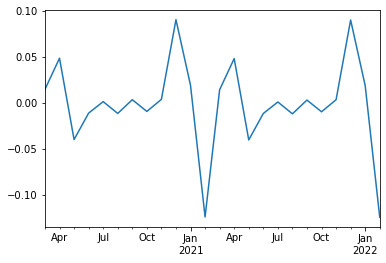

In [21]:
# Modelo
proy_itmbs = HT('itmbs')
proy_itmbs.plot()
# Proyeccion
cambio_itmbs = cambio('itmbs')
cambio_itmbs

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    1210.000000
2020-04-01    1114.145046
2020-05-01    1079.175113
2020-06-01     951.615218
2020-07-01    1003.688000
2020-08-01    1013.538982
2020-09-01    1004.249217
2020-10-01    1086.515105
2020-11-01    1074.198289
2020-12-01    1114.859013
2021-01-01    1178.178351
2021-02-01    1118.000370
2021-03-01    1248.611718
2021-04-01    1150.204667
2021-05-01    1114.593919
2021-06-01     983.280627
2021-07-01    1037.543207
2021-08-01    1048.188214
2021-09-01    1039.038579
2021-10-01    1124.649762
2021-11-01    1112.390674
2021-12-01    1155.005861
2022-01-01    1221.143306
2022-02-01    1159.281480
Freq: MS, dtype: float64

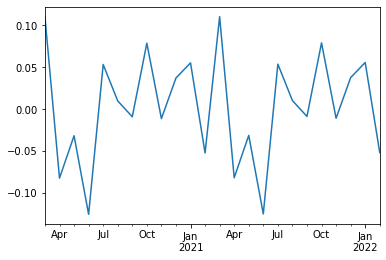

In [22]:
# Modelo
proy_acp_tbm = HT('acp_tbm')
proy_acp_tbm.plot()
# Proyeccion
cambio_acp_tbm = cambio('acp_tbm')
cambio_acp_tbm

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    30985.000000
2020-04-01    29711.614088
2020-05-01    31497.769656
2020-06-01    31286.711798
2020-07-01    32351.158869
2020-08-01    33096.165901
2020-09-01    31561.092292
2020-10-01    33541.848235
2020-11-01    31811.529381
2020-12-01    32409.431247
2021-01-01    34054.762770
2021-02-01    30517.091347
2021-03-01    33204.759609
2021-04-01    31911.602493
2021-05-01    33905.932934
2021-06-01    33754.318626
2021-07-01    34981.046227
2021-08-01    35866.926672
2021-09-01    34280.096297
2021-10-01    36513.252937
2021-11-01    34707.362591
2021-12-01    35439.044313
2022-01-01    37321.748275
2022-02-01    33519.751147
Freq: MS, dtype: float64

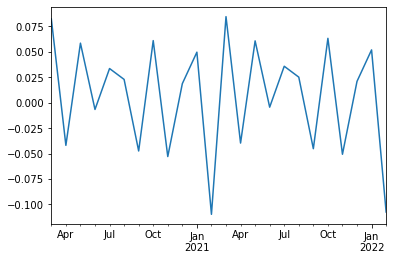

In [23]:
# Modelo
proy_vacuno = HT('vacuno')
proy_vacuno.plot()
# Proyeccion
cambio_vacuno = cambio('vacuno')
cambio_vacuno

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    159426.000000
2020-04-01    130988.829523
2020-05-01    134659.071820
2020-06-01    159206.695785
2020-07-01    125791.689472
2020-08-01    124822.635141
2020-09-01    100484.323716
2020-10-01     99342.295794
2020-11-01     81681.097283
2020-12-01     70209.047233
2021-01-01     81360.128193
2021-02-01     74537.224522
2021-03-01     73774.579907
2021-04-01     59746.105724
2021-05-01     60539.482532
2021-06-01     70549.211312
2021-07-01     54942.767372
2021-08-01     53737.774087
2021-09-01     42639.527806
2021-10-01     41550.476744
2021-11-01     33673.722484
2021-12-01     28529.252372
2022-01-01     32586.422324
2022-02-01     29425.647020
Freq: MS, dtype: float64

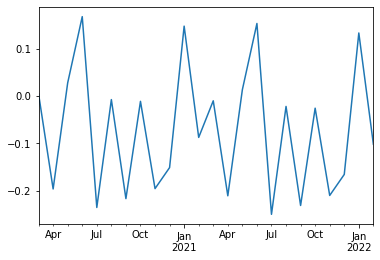

In [24]:
# Modelo
proy_pconst = HT('pconst')
proy_pconst.plot()
# Proyeccion
cambio_pconst = cambio('pconst')
cambio_pconst

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    162.778469
2020-04-01    146.669969
2020-05-01    144.250946
2020-06-01    147.935497
2020-07-01    145.254558
2020-08-01    147.006205
2020-09-01    143.658553
2020-10-01    161.924894
2020-11-01    154.217108
2020-12-01    153.667216
2021-01-01    146.228454
2021-02-01    144.093108
2021-03-01    156.448809
2021-04-01    140.545403
2021-05-01    137.814292
2021-06-01    140.912048
2021-07-01    137.944900
2021-08-01    139.191171
2021-09-01    135.614977
2021-10-01    152.401743
2021-11-01    144.713488
2021-12-01    143.766540
2022-01-01    136.398198
2022-02-01    134.004721
Freq: MS, dtype: float64

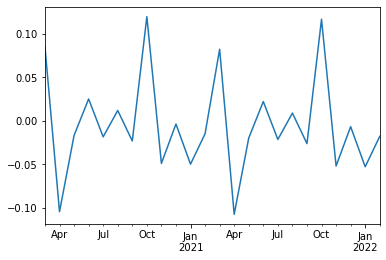

In [25]:
# Modelo
proy_pib_const_e = HT('pib_const_e')
proy_pib_const_e.plot()
# Proyeccion
cambio_pib_const_e = cambio('pib_const_e')
cambio_pib_const_e

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    347.790000
2020-04-01    349.679061
2020-05-01    343.196832
2020-06-01    345.281811
2020-07-01    346.278787
2020-08-01    350.599406
2020-09-01    351.722708
2020-10-01    352.495423
2020-11-01    353.411847
2020-12-01    353.645929
2021-01-01    347.093781
2021-02-01    347.213701
2021-03-01    354.393901
2021-04-01    356.150427
2021-05-01    349.383029
2021-06-01    351.339460
2021-07-01    352.187395
2021-08-01    356.413209
2021-09-01    357.386149
2021-10-01    358.002025
2021-11-01    358.763124
2021-12-01    358.831078
2022-01-01    352.016412
2022-02-01    351.971604
Freq: MS, dtype: float64

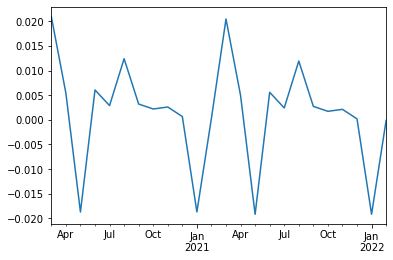

In [26]:
# Modelo
proy_imae_s = HT('imae_s')
proy_imae_s.plot()
# Proyeccion
cambio_imae_s = cambio('imae_s')
cambio_imae_s

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    1065.200000
2020-04-01    1484.968046
2020-05-01    1499.625828
2020-06-01    1502.424999
2020-07-01    1577.648585
2020-08-01    1462.952493
2020-09-01    1535.563755
2020-10-01    1674.291554
2020-11-01    1339.117558
2020-12-01    1225.996501
2021-01-01    1275.176313
2021-02-01    1227.352616
2021-03-01    1392.685607
2021-04-01    1412.668890
2021-05-01    1426.613023
2021-06-01    1429.275910
2021-07-01    1500.837060
2021-08-01    1391.725216
2021-09-01    1460.801228
2021-10-01    1592.774738
2021-11-01    1273.919475
2021-12-01    1166.305983
2022-01-01    1213.091360
2022-02-01    1167.596072
Freq: MS, dtype: float64

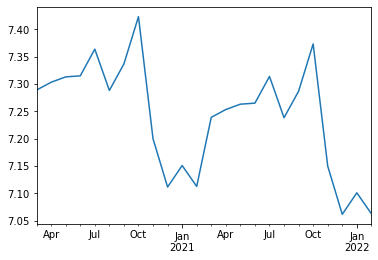

In [27]:
# Modelo
proy_zl_mtm = HT('zl_mtm')
proy_zl_mtm.plot()
# Proyeccion
#cambio_zl_mtm = cambio('zl_mtm')
#cambio_zl_mtm
ultimo_valor =data_nodiff.shape[0]-1
ultimo_valor
s = pd.Series(data_nodiff['zl_mtm'])
#s
t = pd.Series(proy_zl_mtm)
t.iloc[0] = np.log(s.iat[ultimo_valor])
cambio_zl_mtm = np.exp(t)
cambio_zl_mtm

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2019-11-01    1065.200000
2019-12-01    1259.120150
2020-01-01    1330.687128
2020-02-01    1298.364696
2020-03-01    1452.385256
2020-04-01    1473.196585
2020-05-01    1487.646811
2020-06-01    1490.535707
2020-07-01    1565.213285
2020-08-01    1451.248146
2020-09-01    1523.102293
2020-10-01    1660.803992
2020-11-01    1310.203645
2020-12-01    1196.054711
2021-01-01    1264.037120
2021-02-01    1233.333619
2021-03-01    1379.639765
2021-04-01    1399.408719
2021-05-01    1413.135178
2021-06-01    1415.879378
2021-07-01    1486.816586
2021-08-01    1378.559609
2021-09-01    1446.814804
2021-10-01    1577.619450
2021-11-01    1244.579592
2021-12-01    1136.148025
2022-01-01    1200.725406
2022-02-01    1171.559748
2022-03-01    1310.537871
Freq: MS, dtype: float64

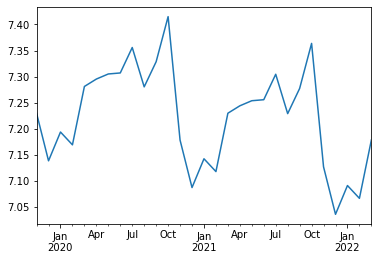

In [28]:
data11 = data['2014-02-01':'2019-10-01']
fitted_model = ExponentialSmoothing(data11['zl_mtm'],trend='add', 
                                                         seasonal='add', seasonal_periods=12).fit()
proy_zl_mtm = fitted_model.forecast(29)
proy_zl_mtm.plot()
# Proyeccion
#cambio_entrada = cambio('entrada')
#cambio_entrada
ultimo_valor =data_nodiff.shape[0]-1
ultimo_valor
s = pd.Series(data_nodiff['zl_mtm'])
#s
t = pd.Series(proy_zl_mtm)
t.iloc[0] = np.log(s.iat[ultimo_valor])
cambio_zl_mtm = np.exp(t)
cambio_zl_mtm

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    557.960964
2020-04-01    487.087548
2020-05-01    484.344354
2020-06-01    502.086191
2020-07-01    491.099909
2020-08-01    501.932589
2020-09-01    495.109973
2020-10-01    552.143060
2020-11-01    530.269658
2020-12-01    532.636911
2021-01-01    520.233407
2021-02-01    516.486396
2021-03-01    567.503828
2021-04-01    493.762328
2021-05-01    489.340444
2021-06-01    505.569765
2021-07-01    492.854375
2021-08-01    502.042060
2021-09-01    493.562697
2021-10-01    548.577786
2021-11-01    525.084651
2021-12-01    525.665834
2022-01-01    511.708552
2022-02-01    506.324882
Freq: MS, dtype: float64

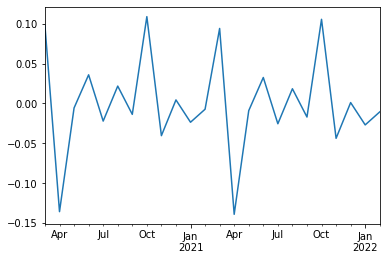

In [29]:
# Modelo
proy_pib_const_i = HT('pib_const_i')
proy_pib_const_i.plot()
# Proyeccion
cambio_pib_const_i = cambio('pib_const_i')
cambio_pib_const_i

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    425.600000
2020-04-01    426.099803
2020-05-01    423.414660
2020-06-01    425.803457
2020-07-01    423.260327
2020-08-01    421.144449
2020-09-01    420.791956
2020-10-01    422.258248
2020-11-01    426.810397
2020-12-01    418.767067
2021-01-01    420.208100
2021-02-01    420.796562
2021-03-01    423.828557
2021-04-01    424.243699
2021-05-01    421.488208
2021-06-01    423.783645
2021-07-01    421.170596
2021-08-01    418.983608
2021-09-01    418.551450
2021-10-01    419.928194
2021-11-01    424.372618
2021-12-01    416.294195
2022-01-01    417.645422
2022-02-01    418.148900
Freq: MS, dtype: float64

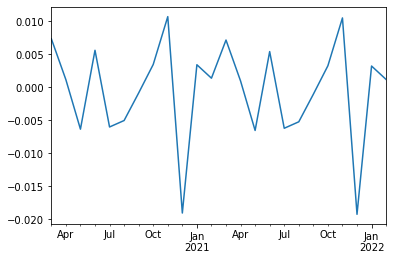

In [30]:
# Modelo
proy_bvpsi = HT('bvpsi')
proy_bvpsi.plot()
# Proyeccion
cambio_bvpsi = cambio('bvpsi')
cambio_bvpsi

C:\Users\vblanco\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2020-03-01    58304.000000
2020-04-01    48877.184041
2020-05-01    45599.651557
2020-06-01    49378.118384
2020-07-01    49585.167383
2020-08-01    50465.348902
2020-09-01    46463.437599
2020-10-01    45436.240307
2020-11-01    35859.819945
2020-12-01    37673.474939
2021-01-01    12200.278358
2021-02-01    38132.446585
2021-03-01    43420.670519
2021-04-01    36273.303885
2021-05-01    33722.924011
2021-06-01    36389.911464
2021-07-01    36415.058212
2021-08-01    36932.207562
2021-09-01    33884.890612
2021-10-01    33020.215281
2021-11-01    25969.786528
2021-12-01    27188.091216
2022-01-01     8773.957769
2022-02-01    27327.709561
Freq: MS, dtype: float64

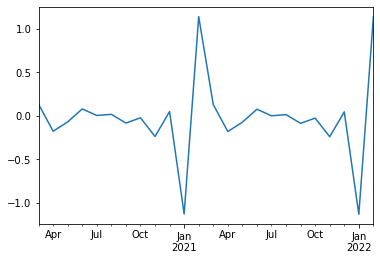

In [31]:
# Modelo
proy_concreto = HT('concreto')
proy_concreto.plot()
# Proyeccion
cambio_concreto = cambio('concreto')
cambio_concreto

In [32]:
# Proyecciones promedios
a = pd.Series(cambio_ipc)
b = pd.Series(cambio_entrada)
c = pd.Series(cambio_comercio)
d = pd.Series(cambio_pib_const_f)
e = pd.Series(cambio_ied_empresas)
f = pd.Series(cambio_mcp)
g = pd.Series(cambio_itdm)
h = pd.Series(cambio_gasolina)
i = pd.Series(cambio_itmbs)
j = pd.Series(cambio_acp_tbm)
k = pd.Series(cambio_vacuno)
l = pd.Series(cambio_pconst)
m = pd.Series(cambio_pib_const_e)
n = pd.Series(cambio_imae_s)
o = pd.Series(cambio_zl_mtm)
p = pd.Series(cambio_pib_const_i)
q = pd.Series(cambio_bvpsi)
r = pd.Series(cambio_concreto)

d1 = {'ipc':a,'entrada':b, 'comercio': c , 'pib_const_f':d, 'ied_empresas':e, 'mcp':f, 'itdm':g
      , 'gasolina':h, 'itmbs':i, 'acp_tbm':j, 'vacuno':k, 'pconst':l, 'pib_const_e': m, 'imae_s':n
     ,'zl_mtm': o, 'pib_const_i':p, 'bvpsi':q, 'concreto':r}
proyeccion_prom = pd.DataFrame(d1)
#proyeccion_prom
proyeccion_prom = proyeccion_prom.dropna()

In [33]:
index = ['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01','2020-10-01'
         ,'2020-11-01','2020-12-01','2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'
         ,'2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01'
         ,'2022-01-01', '2022-02-01','2022-03-01']
proyeccion_prom.index = index

In [34]:
proyeccion_prom.columns

Index(['ipc', 'entrada', 'comercio', 'pib_const_f', 'ied_empresas', 'mcp',
       'itdm', 'gasolina', 'itmbs', 'acp_tbm', 'vacuno', 'pconst',
       'pib_const_e', 'imae_s', 'zl_mtm', 'pib_const_i', 'bvpsi', 'concreto'],
      dtype='object')

In [36]:
proyeccion_prom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2020-04-01 to 2022-03-01
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ipc           24 non-null     float64
 1   entrada       24 non-null     float64
 2   comercio      24 non-null     float64
 3   pib_const_f   24 non-null     float64
 4   ied_empresas  24 non-null     float64
 5   mcp           24 non-null     float64
 6   itdm          24 non-null     float64
 7   gasolina      24 non-null     float64
 8   itmbs         24 non-null     float64
 9   acp_tbm       24 non-null     float64
 10  vacuno        24 non-null     float64
 11  pconst        24 non-null     float64
 12  pib_const_e   24 non-null     float64
 13  imae_s        24 non-null     float64
 14  zl_mtm        24 non-null     float64
 15  pib_const_i   24 non-null     float64
 16  bvpsi         24 non-null     float64
 17  concreto      24 non-null     float64
 18  d2015_06      24 non

In [37]:
print(proyeccion_prom1.iloc[:1,0:])

              ipc     entrada  comercio  pib_const_f  ied_empresas       mcp  \
2020-04-01  154.0  708.540896   11268.6    595.10502    242.816125  626423.0   

             itdm    gasolina  itmbs  acp_tbm  ...  concreto  d2015_06  \
2020-04-01  192.6  537.857636   57.7   1210.0  ...   58304.0         0   

            d2015_03  d2019_08  d2018_07  d2018_08  d2018_06  d2016_06  \
2020-04-01         0         0         0         0         0         0   

            d2016_10  d2020_03  
2020-04-01         0         0  

[1 rows x 27 columns]


In [38]:
proyeccion_prom1.to_csv('proyeccion_prom_v2.csv', header = True, index= True)

<AxesSubplot:>

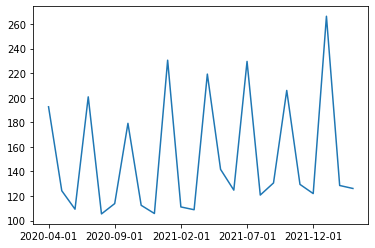

In [179]:
proyeccion_prom1.itdm.plot()

<AxesSubplot:>

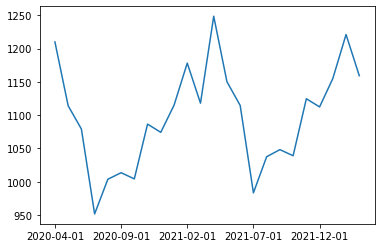

In [180]:
proyeccion_prom1.acp_tbm.plot()

<AxesSubplot:>

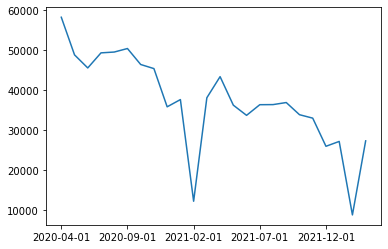

In [39]:
proyeccion_prom1.concreto.plot()